![unimodular matrix](images/unimodular_matrix.png)

本篇的重點, 是生成一個 unimodular matrix。一個矩陣 $A$ 叫 unimodular 意思是

$$\det(A) = 1 \mbox{ 或 } -1$$

這樣的矩陣有什麼好處呢? 其中一個好處是如果 $A$ 的元素都是整數, 那反矩陣的元素也都會是整數! 像要出題目考學生求反矩陣, 答案就一定都是整數矩陣。

In [1]:
import sympy as sp

`sympy` 有個亂數生成矩陣的指定 `randMatrix`, 使用方法是

    randMatrix(n, min=l, max=u)

這樣會產生 $n \times n$ 整數的矩陣, 然後每個元素最小是 $l$, 最大是 $u$。

In [2]:
from sympy.matrices.dense import randMatrix

In [3]:
sp.init_printing()

我們試用看看:

In [4]:
A = randMatrix(3, min=-5, max=5)

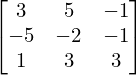

In [5]:
A

我們用的策略是這樣, 如果我們一個上三角矩陣 U, 一個下三角矩陣 L, 他們好巧的行列式值都是 1。那麼他們的乘積

$$A = LU$$

行列式值也會是 1, 因為

$$\det(A) = \det(LU) = \det(L)\det(U) = 1$$

要造一個上三角或下三角行列式值是 1 的矩陣很容易: 讓對角線的值都是 1 就好。於是我們可以這樣做:

1. 用 `randMatrix` 生出一個 $n\times n$ 的矩陣
2. 上三角部份都給 U, 且讓 U 對角線元素都是 1
3. 下三角部份都給 L, 且讓 L 對角線元素都是 1

In [6]:
def generating(n):
    A = randMatrix(n, min=-3, max=3)
    L = sp.Matrix.eye(n)
    U = sp.Matrix.eye(n)
    for i in range(n):
        for j in range(i+1, n):
            U[i, j] = A[i, j]
            L[j, i] = A[j, i]
    return L, U

來試試看我們是不是成功了:

In [7]:
L, U = generating(4)

這時我們只要算 LU 的乘積, 這就會是一個 unimodular matrix (事實上是行列式值為 1 的 unimodular matrix)。

In [8]:
A = L*U

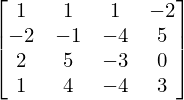

In [9]:
A

In [10]:
A.det()

來看看反矩陣是不是也是個整數矩陣?

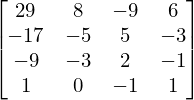

In [11]:
A.inv()

現在看來我們真的可以亂數生成 unimodular matrix, 但問題是我們只能生出行列式值是 1 的。那行列式值是 -1 的呢? 其實很簡單, 只要把我們生出的矩陣任意交換兩列就好了!

In [12]:
from random import sample, randint

In [13]:
def unimodular_matrix(n):
    L, U = generating(n)
    A = L * U
    if randint(0,1):
        s, t = sample(range(n), 2)
        tmp = A[s, :]
        A[s,:] = A[t,:]
        A[t,:] = tmp
    return A

試用一下我們最後的成果。

In [14]:
A = unimodular_matrix(3)

In [15]:
A.det()

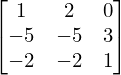

In [16]:
A.inv()

再試一次, 看有沒有可能生出行列式值是 -1 的。

In [17]:
A = unimodular_matrix(3)

In [18]:
A.det()

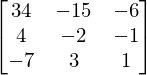

In [19]:
A.inv()